In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from init_env import set_project_root
project_root = set_project_root()
os.chdir(project_root)


import numpy as np
import project.problems.project_problems as functions
import algorithms as algorithms
from optSolver import optSolver
from framework import Problem, Method, Options

import scipy.io
import matplotlib.pyplot as plt

def plot_f_vs_iter(history):
    # Plot training and testing accuracy vs gradient evaluations
    plt.figure()
    plt.plot(history['iterations'], history['f'])
    plt.xlabel('iteration')
    plt.ylabel('f')
    plt.title(f'')
    plt.grid()

In [6]:
np.random.seed(0)
problem = Problem("quad_1000_1000", np.random.rand(1000) * 20 - 10)
method = Method(
        "GradientDescent",
        step_type="Wolfe",
        alpha=1,
        tau=0.5,
        c_1_ls=1e-4,
        c_2_ls=0.9,
        epsilon_sy=1e-6,
    )
options = Options(term_tol=1e-6, max_iterations=1e3)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)

KeyboardInterrupt: 

3.989471903425398


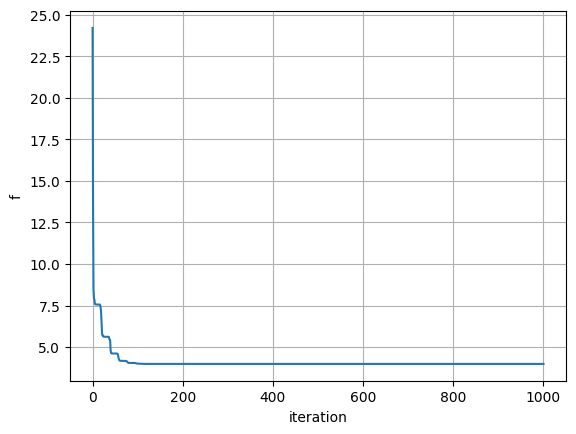

In [2]:
problem  = Problem("rosenbrock_100", np.concatenate(([-1.2, 1.0], np.ones(98))))
# method = Method(
#         "DFP", step_type="Backtracking", alpha=1, tau=0.5, c_1_ls=1e-4, epsilon_sy=1e-6
#     )
method = Method(
        "DFP",
        step_type="Wolfe",
        alpha=1,
        tau=0.5,
        c_1_ls=1e-4,
        c_2_ls=0.1,
        epsilon_sy=1e-6,
    )
options = Options(term_tol=1e-6, max_iterations=1e3)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)

In [3]:
history["n_skipped"]

0

5.171620428745377e-17


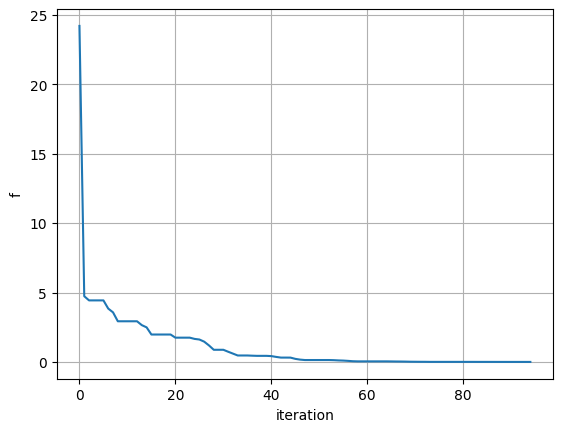

In [3]:
problem = Problem("rosenbrock_2", x0=np.array([-1.2, 1]))
method = Method("TRSR1CG", c_1_tr=1e-3, c_2_tr=0.75, epsilon_sy=1e-8, term_tol_CG=1e-10)
options = Options(term_tol=1e-6, max_iterations=1e2)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)

Number of skipped steps (GradientDescent): 0
0.001753684655795377


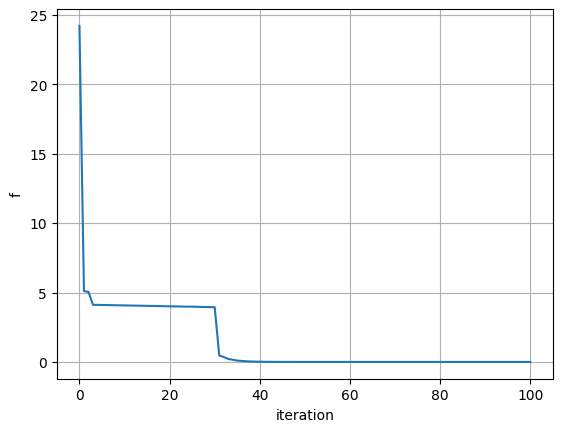

In [16]:
problem = Problem("rosenbrock_2", x0=np.array([-1.2, 1]))
method = Method("GradientDescent", step_type="Wolfe", alpha=1, tau=0.5,
                c_1_ls=1e-4, c_2_ls = 0.9)
options = Options(term_tol=1e-6, max_iterations=1e2)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)

Number of skipped steps (GradientDescent): 0
0.004326904052586884


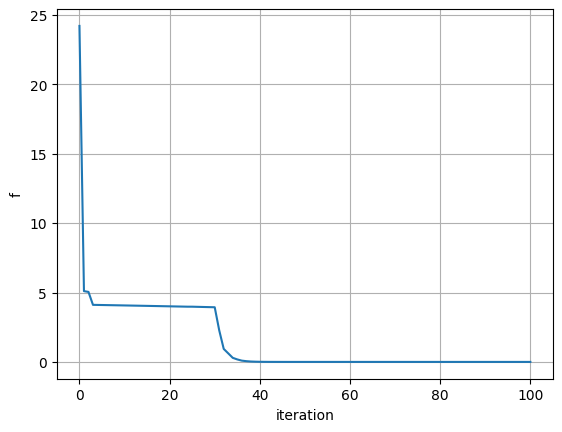

In [8]:
problem = Problem("rosenbrock_2", x0=np.array([-1.2, 1]))
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c_1_ls=1e-4, c_2_ls = 0.9)
options = Options(term_tol=1e-6, max_iterations=1e2)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)